## Load data

In [27]:
# Import the dataset loading function from sklearn
from sklearn.datasets import fetch_california_housing

# Load the California housing dataset
house_dataset = fetch_california_housing()

# Display the oringal data
house_dataset.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [28]:
# Import pandas package to format the data
import pandas as pd

# Extract features with their names into the a dataframe format
data = pd.DataFrame(house_dataset.data, columns=house_dataset.feature_names)

# Extract target with their names into a pd.Series object with name MedPrice
target = pd.Series(house_dataset.target, name = 'MedPrice')

# Visualize the first 5 samples of the data
data.head(5)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.33,41.00,6.98,1.02,322.00,2.56,37.88,-122.23
1,8.30,21.00,6.24,0.97,"2,401.00",2.11,37.86,-122.22
2,7.26,52.00,8.29,1.07,496.00,2.80,37.85,-122.24
3,5.64,52.00,5.82,1.07,558.00,2.55,37.85,-122.25
4,3.85,52.00,6.28,1.08,565.00,2.18,37.85,-122.25


### Split the dataset into training and test set

In [29]:
# Split data into training and test dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

# Check the shape of whole dataset and the splited training and test set
print("--Shape of the whole data--\n {}".format(data.shape))
print("\n--Shape of the target vector--\n {}".format(target.shape))
print("\n--Shape of the training data--\n {}".format(X_train.shape))
print("\n--Shape of the testing data--\n {}".format(X_test.shape))

--Shape of the whole data--
 (20640, 8)

--Shape of the target vector--
 (20640,)

--Shape of the training data--
 (16512, 8)

--Shape of the testing data--
 (4128, 8)


In [30]:
(data.shape, target.shape), (X_train.shape, y_train.shape), (X_test.shape, y_test.shape)

(((20640, 8), (20640,)), ((16512, 8), (16512,)), ((4128, 8), (4128,)))

## Exploratory data analysis  &  data preprocessing

### Q1: What are the data type of the values in each feature?

In [31]:
data.dtypes

MedInc        float64
HouseAge      float64
AveRooms      float64
AveBedrms     float64
Population    float64
AveOccup      float64
Latitude      float64
Longitude     float64
dtype: object

In [32]:
# Check for feature value type
print("-- Feature type --\n{}".format(data.dtypes))
print("\n-- Target type --\n{}".format(target.dtypes))

-- Feature type --
MedInc        float64
HouseAge      float64
AveRooms      float64
AveBedrms     float64
Population    float64
AveOccup      float64
Latitude      float64
Longitude     float64
dtype: object

-- Target type --
float64


### Q2: How many distinct values each feature has in the dataset?

In [33]:
# Check for unique feature values
print("\n-- # of unique feature values --\n{}".format(data.nunique()))


-- # of unique feature values --
MedInc        12928
HouseAge         52
AveRooms      19392
AveBedrms     14233
Population     3888
AveOccup      18841
Latitude        862
Longitude       844
dtype: int64


### Q3: What are the scale and basic statistics of each feature?

In [34]:
# Viewing the data statistics
pd.options.display.float_format = '{:,.2f}'.format
data.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,"20,640.00","20,640.00","20,640.00","20,640.00","20,640.00","20,640.00","20,640.00","20,640.00"
mean,3.87,28.64,5.43,1.10,"1,425.48",3.07,35.63,-119.57
std,1.90,12.59,2.47,0.47,"1,132.46",10.39,2.14,2.00
min,0.50,1.00,0.85,0.33,3.00,0.69,32.54,-124.35
25%,2.56,18.00,4.44,1.01,787.00,2.43,33.93,-121.80
50%,3.53,29.00,5.23,1.05,"1,166.00",2.82,34.26,-118.49
75%,4.74,37.00,6.05,1.10,"1,725.00",3.28,37.71,-118.01
max,15.00,52.00,141.91,34.07,"35,682.00","1,243.33",41.95,-114.31


### Q4: Are there missing values contained in the data?

In [35]:
# Copy data to avoid inplace
train_data = X_train.copy()

# Add a column "MedPrice" for the target house price
train_data['MedPrice'] = y_train

# Check if there're missing values
print("\n-- check missing values in training data --\n{}".format(train_data.isnull().any()))
print("\n-- check missing values in test data --\n{}".format(X_test.isnull().any()))


-- check missing values in training data --
MedInc        False
HouseAge      False
AveRooms      False
AveBedrms     False
Population    False
AveOccup      False
Latitude      False
Longitude     False
MedPrice      False
dtype: bool

-- check missing values in test data --
MedInc        False
HouseAge      False
AveRooms      False
AveBedrms     False
Population    False
AveOccup      False
Latitude      False
Longitude     False
dtype: bool


##   Feature engineering: feature selection

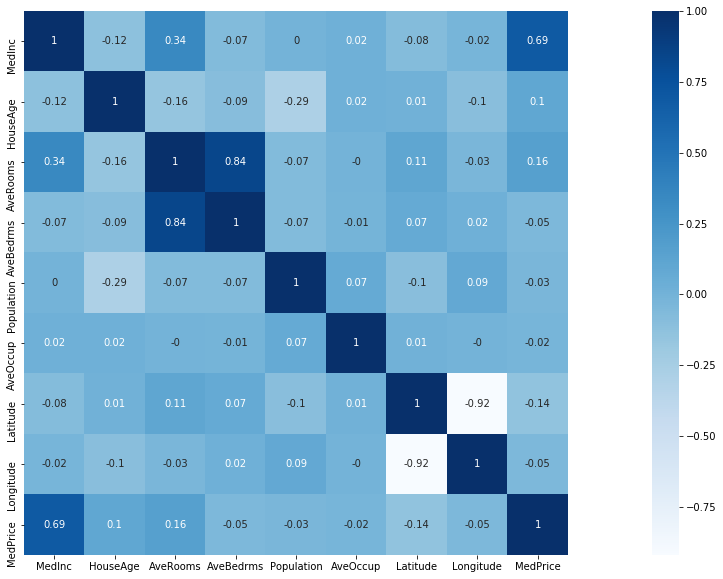

In [10]:
# Can we gain some insights by visualizing the distribution of them or correlationship between them?
# Import libraries for plotting
import matplotlib.pyplot as plt 
import seaborn as sns 


# Pretty display for notebooks (only in a Jupyter notebook)
%matplotlib inline


# Plot the correlation across all the features and the target
correlation_matrix = train_data.corr().round(2)
plt.figure(figsize=(30,10))
sns.heatmap(data=correlation_matrix, square= True, annot=True, cmap='Blues') #  fmt='.1f', annot_kws={'size':15}, 

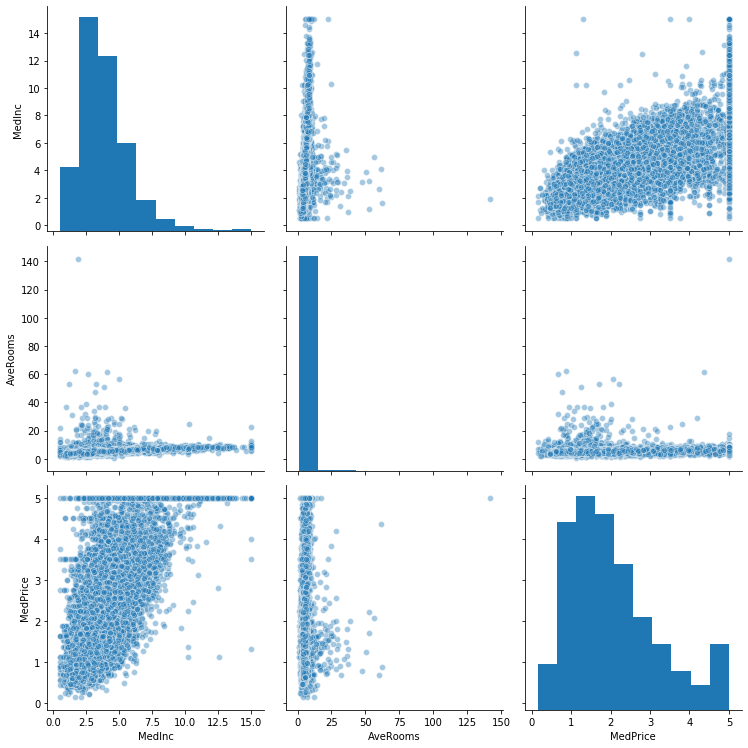

In [11]:
# Select high correlation features & display the pairplot

selected_feature_set = ['MedInc', 'AveRooms']  # 'PTRATIO', , 'Latitude', 'HouseAge'
sub_train_data = train_data[ selected_feature_set + ['MedPrice']] 

# Extract the new training features
X_train = sub_train_data.drop(['MedPrice'], axis = 1)

# Select same feature sets for test data
X_test = X_test[selected_feature_set]


sns.pairplot(sub_train_data, height=3.5, plot_kws={'alpha': 0.4})
plt.tight_layout()


## Build up a linear regressor & a decision tree regressor

### Linear regression

In [12]:
# Import library for linear regression
from sklearn.linear_model import LinearRegression

# Training
# Create a Linear regressor
linear_regressor = LinearRegression()

# Train the model using the training sets 
linear_regressor.fit(X_train, y_train)

# Display the learned parameters
# Convert the coefficient values to a dataframe
coeffcients = pd.DataFrame(linear_regressor.coef_, X_train.columns, columns=['Coefficient'])  

# Display the intercept value
print("Learned intercept: {:.2f}".format(linear_regressor.intercept_))

print("\n--The learned coefficient value learned by the linear regression model--")
print(coeffcients)



Learned intercept: 0.60

--The learned coefficient value learned by the linear regression model--
          Coefficient
MedInc           0.44
AveRooms        -0.04


In [13]:
from sklearn.metrics import mean_squared_error # mean_absolute_error

# Model prediction on training data
y_pred_train = linear_regressor.predict(X_train)
print('\n--Train MSE--\n{}'.format(mean_squared_error(y_train, y_pred_train)))


# Testing
y_pred_test = linear_regressor.predict(X_test)

print('Test MSE: {:.2f}'.format(mean_squared_error(y_test, y_pred_test)))


--Train MSE--
0.690985965844761
Test MSE: 0.70


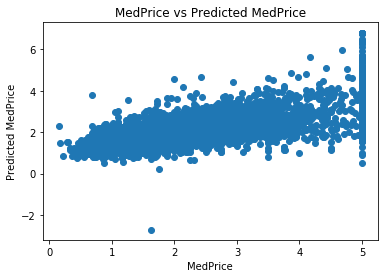

In [14]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_test, y_pred_test)
plt.xlabel("MedPrice")
plt.ylabel("Predicted MedPrice")
plt.title("MedPrice vs Predicted MedPrice")
plt.show()

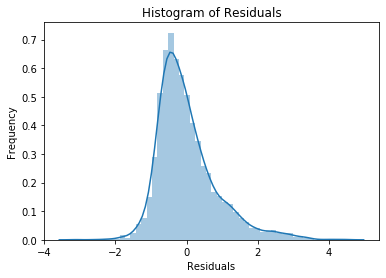

In [15]:
# Checking Normality of errors
sns.distplot(y_test - y_pred_test)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

### Decision tree

In [16]:
# Import library for decision tree
from sklearn.tree import DecisionTreeRegressor

tree_regressor = DecisionTreeRegressor(max_depth=3, random_state=42)
tree_regressor.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [17]:
# Model prediction on training & test data
y_pred_train = tree_regressor.predict(X_train)
y_pred_test = tree_regressor.predict(X_test)

print('Train MSE: {:.2f}'.format(mean_squared_error(y_train, y_pred_train)))

print('Test MSE: {:.2f}'.format(mean_squared_error(y_test, y_pred_test)))

Train MSE: 0.68
Test MSE: 0.71


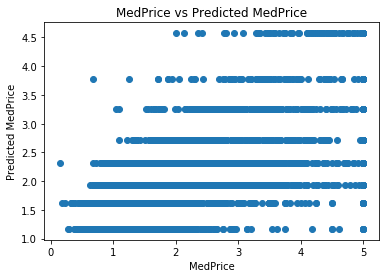

In [18]:
# Plot outputs
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_test, y_pred_test)
plt.xlabel("MedPrice")
plt.ylabel("Predicted MedPrice")
plt.title("MedPrice vs Predicted MedPrice")
plt.show()

/home/qq/.virtualenvs/book/lib/python3.6/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


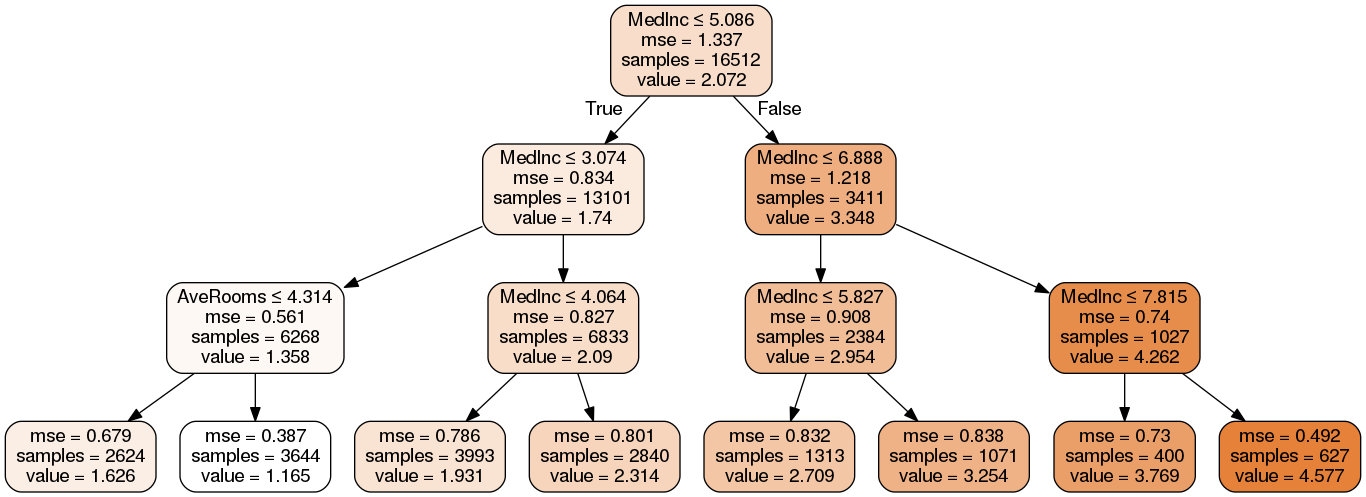

In [19]:
# Visualizing the decision tree
from sklearn.externals.six import StringIO 
import sklearn.tree as tree
import pydotplus

from IPython.display import Image
dot_data = StringIO()
tree.export_graphviz(tree_regressor, 
                     out_file=dot_data, 
                     class_names=['MedPrice'], # the target names.
                     feature_names=selected_feature_set, # the feature names.
                     filled=True, # Whether to fill in the boxes with colours.
                     rounded=True, # Whether to round the corners of the boxes.
                     special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png())

## Fine-Tuning: tune the tree depth hyperparameter in the tree regressor

In [20]:
import numpy as np
from sklearn.model_selection import KFold

kf = KFold(n_splits = 5)  # sample indices of datasets for 5-fold cv

cv_sets = []
for train_index, test_index in kf.split(X_train):
    cv_sets.append((X_train.iloc[train_index],    
                    y_train.iloc[train_index], 
                    X_train.iloc[test_index],
                    y_train.iloc[test_index])) # construct 5-fold cv datasets

In [21]:
max_depths = list(range(1, 11))  # candidate max_depth hyperparamters

for max_depth in max_depths:
    cv_results = []
    regressor = DecisionTreeRegressor(max_depth=max_depth, random_state=42)    
    for x_tr, y_tr, x_te, y_te in cv_sets: # loop through all the cv sets and average the validation results
        regressor.fit(x_tr, y_tr)
        cv_results.append(mean_squared_error(regressor.predict(x_te) , y_te))
    print('Tree depth: {}, Avg. MSE: {}'.format(max_depth, np.mean(cv_results))) 

Tree depth: 1, Avg. MSE: 0.9167053334390705
Tree depth: 2, Avg. MSE: 0.7383634845663015
Tree depth: 3, Avg. MSE: 0.68854467373395
Tree depth: 4, Avg. MSE: 0.6388802215441052
Tree depth: 5, Avg. MSE: 0.6229559075742178
Tree depth: 6, Avg. MSE: 0.6181574550660847
Tree depth: 7, Avg. MSE: 0.6315191091236836
Tree depth: 8, Avg. MSE: 0.6531981343523263
Tree depth: 9, Avg. MSE: 0.6782896327438639
Tree depth: 10, Avg. MSE: 0.7025407934796457


In [22]:
# Hp tuning with Sklearn

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer 

# Build up the decision tree regressor
regressor = DecisionTreeRegressor(random_state=42)

# Create a dictionary for the hyperparameter 'max_depth' with a range from 1 to 10
hps = {'max_depth':list(range(1, 11))}

# Transform 'performance_metric' into a scoring function using 'make_scorer'.
# The default scorer function is the greater the better, here MSE is the lower the better,
# so we set ``greater_is_better'' to be False.
scoring_fnc = make_scorer(mean_squared_error, greater_is_better=False)

# Create the grid search cv object (5-fold cross-validation)
grid_search = GridSearchCV(estimator=regressor, 
                           param_grid=hps, 
                           scoring=scoring_fnc, 
                           cv=5)

# Fit the grid search object to the training data to search the optimal model
grid_search = grid_search.fit(X_train, y_train)


0.9167053334390705 {'max_depth': 1}
0.7383634845663015 {'max_depth': 2}
0.68854467373395 {'max_depth': 3}
0.6388802215441052 {'max_depth': 4}
0.6229559075742178 {'max_depth': 5}
0.6181574550660847 {'max_depth': 6}
0.6315191091236836 {'max_depth': 7}
0.6531981343523263 {'max_depth': 8}
0.6782896327438639 {'max_depth': 9}
0.7025407934796457 {'max_depth': 10}


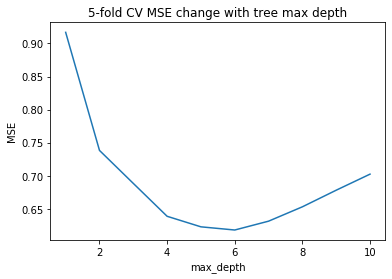

In [23]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(-mean_score, params)
    
plt.plot(hps['max_depth'], -cvres["mean_test_score"])
plt.title('5-fold CV MSE change with tree max depth')
plt.xlabel('max_depth')
plt.ylabel('MSE')
plt.show()

## Retrive the best model

In [24]:
grid_search.best_params_
best_tree_regressor = grid_search.best_estimator_

# Produce the value for 'max_depth'
print("Best hyperparameter is {}.".format(grid_search.best_params_))

# Model prediction on training & test data
y_pred_train = best_tree_regressor.predict(X_train)
y_pred_test = best_tree_regressor.predict(X_test)

print('\n--Train MSE--\n{}'.format(mean_squared_error(y_train, y_pred_train)))

print('\n--Test MSE--\n{}\n'.format(mean_squared_error(y_test, y_pred_test)))

Best hyperparameter is {'max_depth': 6}.

--Train MSE--
0.5825729954046606

--Test MSE--
0.6422136569733781



## Real test curve V.S. cross-validation curve

Tree depth: 1, Test MSE: 0.9441349708215667
Tree depth: 2, Test MSE: 0.7542635096031615
Tree depth: 3, Test MSE: 0.7063353387614023
Tree depth: 4, Test MSE: 0.6624543803195595
Tree depth: 5, Test MSE: 0.6455716785858321
Tree depth: 6, Test MSE: 0.6422136569733781
Tree depth: 7, Test MSE: 0.6423777285754818
Tree depth: 8, Test MSE: 0.6528185531960586
Tree depth: 9, Test MSE: 0.6751884166016034
Tree depth: 10, Test MSE: 0.7124031319320459


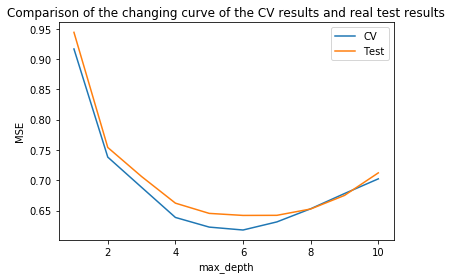

In [25]:
test_results = []
for max_depth in hps['max_depth']:
    tmp_results = []
    regressor = DecisionTreeRegressor(max_depth=max_depth, random_state=42)    
    regressor.fit(X_train, y_train)
    test_results.append(mean_squared_error(regressor.predict(X_test) , y_test))
    print('Tree depth: {}, Test MSE: {}'.format(max_depth, test_results[-1])) 
    
plt.plot(hps['max_depth'], -cvres["mean_test_score"])
plt.plot(hps['max_depth'], test_results)
plt.title('Comparison of the changing curve of the CV results and real test results')
plt.legend(['CV', 'Test'])
plt.xlabel('max_depth')
plt.ylabel('MSE')
plt.show()